In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random
import math
import matplotlib.pyplot as plt

In [2]:
def normalEqn(X, y, _lambda, num_core):
    theta = np.array([x[0] for x in np.zeros((8, 1))])
    m = len(y)-1
    J_min = np.zeros((int(m/num_core), 1))
    for t in range(1,int(m/num_core)+1):
        theta = pd.DataFrame(np.linalg.inv(
            (
                    (X.iloc[0:num_core*t,:].transpose().dot(X.iloc[0:num_core*t,:]))
                    +
                 (_lambda*np.identity(8))
            )
        )).dot(X.iloc[0:num_core*t,:].transpose().dot(y[0:num_core*t]))
        J_min[t-1] = ((sum(np.square((X.iloc[0:num_core*t,:].dot(theta)) - y[0:num_core*t]))) / 2) + (
                    (_lambda / (2 * m)) * (sum(np.square(theta[0: len(theta)-1]))))
    return (J_min, theta)

In [3]:
def computeCost(X, y, theta, i, _lambda, grad, num_core):
    m = len(y)-1
    J = 0
    
    J = sum(np.square((X.iloc[num_core*i:num_core*i+num_core,:].dot(theta)) - y[num_core*i:num_core*i+num_core]) / 2) 
    + ((_lambda / 2*m) * sum(np.square(theta[0: len(theta)-1])))
    
    grad = (((X.iloc[num_core*i:num_core*i+num_core,:].dot(theta)) - y[num_core*i:num_core*i+num_core]).transpose()
            .dot(X.iloc[num_core*i:num_core*i+num_core, :])).transpose() 
    
    grad[0: len(theta)-1] = grad[0: len(theta)-1] + ((_lambda / m)*theta[0: len(theta)-1])
    
    return (J, grad)

In [4]:
#Performs Gradient Descent in each iteration
def gradientDescent(X, y, theta, _lambda, num_core):
    m = len(y)-1
    J_history = np.zeros((int(m/num_core), 1))
    grad = np.zeros((theta.shape[0], 1))
    (J_history[0], grad) = computeCost(X, y, theta, 0, _lambda, grad, num_core)
    alpha=1/m
    theta = theta - (alpha * grad) 
    for x in range(1,int(m/num_core)):
        (J_history[x], grad) = computeCost(X, y, theta, x, _lambda, grad, num_core)
        #alpha=1/math.sqrt(x+1)
        theta = theta - (alpha * grad) 
        J_history[x] = J_history[x - 1] + J_history[x]
    return (J_history, theta)

In [5]:
data_df = pd.read_csv('test_data.csv', header=None)
X = data_df.iloc[:,:7]
y = data_df.iloc[:,7]
num_core=4
m = len(y)
print("Normalizing Features ...\n")

temp_values = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(temp_values)
X = pd.DataFrame(x_scaled)

#add a new columns of one
X[len(X.columns)]=1

print(X.head())

theta = np.array([x[0] for x in np.zeros((8,1))])

_lambda = 0.001

Normalizing Features ...

          0         1         2         3         4         5         6  7
0  0.513514  0.521008  0.084071  0.181335  0.150303  0.132324  0.147982  1
1  0.371622  0.352941  0.079646  0.079157  0.066241  0.063199  0.068261  1
2  0.614865  0.613445  0.119469  0.239065  0.171822  0.185648  0.207773  1
3  0.493243  0.521008  0.110619  0.182044  0.144250  0.149440  0.152965  1
4  0.344595  0.336134  0.070796  0.071897  0.059516  0.051350  0.053313  1


In [6]:
(J_history, OGD_theta) = gradientDescent(X, y, theta, _lambda, num_core)
print("Theta found by gradient descent", OGD_theta)

Theta found by gradient descent 0    2.619769
1    2.581995
2    0.545121
3    1.317343
4    1.021356
5    1.054095
6    1.121033
7    4.165460
dtype: float64


Theta found by normal equation 0    -1.161302
1     7.953341
2    13.358199
3    26.066015
4   -30.047384
5    -7.446509
6     8.622813
7     3.607345
dtype: float64


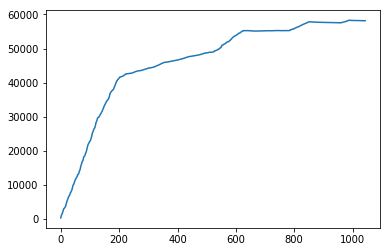

In [7]:
(J_min, normal_theta) = normalEqn(X, y, _lambda, num_core)
print("Theta found by normal equation",normal_theta);
regret = J_history - J_min
plt.plot(regret)
plt.show()